In [ ]:
import geopandas as gpd
import re

from urllib.request import urlopen


In [ ]:
link = "https://data.opencity.in/dataset/map-lakes-streams-bengaluru-urban-within-bbmp-area"

In [ ]:
with urlopen(link) as x:
     data = x.read().decode('utf-8')

In [ ]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(data)

In [ ]:
list_url = []
for link in soup.findAll('a', attrs={'href': re.compile("^https://data")}):
  # print(link)
  httpslink = link['href']
  # print(httpslink)
  list_url.append(httpslink)


In [ ]:
list_url

['https://data.opencity.in/dataset/b0f68537-2bce-4659-9171-9fb0ed3e4bcb/resource/d936310f-aba1-4b2b-aa34-663977917df7/download/bbmp_lakes_masterlist-final.kml',
 'https://data.opencity.in/dataset/b0f68537-2bce-4659-9171-9fb0ed3e4bcb/resource/23141cb5-471e-4796-af80-4311819fd031/download/bbmp_streamnetwork.kml',
 'https://data.opencity.in/dataset/b0f68537-2bce-4659-9171-9fb0ed3e4bcb/resource/dae235c7-89a9-48de-be2c-5c19621b1ecb/download/bbmp_lakes_streams.kml',
 'https://data.opencity.in/dataset/b0f68537-2bce-4659-9171-9fb0ed3e4bcb/resource/d936310f-aba1-4b2b-aa34-663977917df7/download/bbmp_lakes_masterlist-final.kml',
 'https://data.opencity.in/dataset/b0f68537-2bce-4659-9171-9fb0ed3e4bcb/resource/23141cb5-471e-4796-af80-4311819fd031/download/bbmp_streamnetwork.kml',
 'https://data.opencity.in/dataset/b0f68537-2bce-4659-9171-9fb0ed3e4bcb/resource/dae235c7-89a9-48de-be2c-5c19621b1ecb/download/bbmp_lakes_streams.kml']

In [ ]:
# Let us grab one dataset now from that:
lake_link = list_url[3]
lake_link

'https://data.opencity.in/dataset/b0f68537-2bce-4659-9171-9fb0ed3e4bcb/resource/d936310f-aba1-4b2b-aa34-663977917df7/download/bbmp_lakes_masterlist-final.kml'

In [ ]:
!wget https://data.opencity.in/dataset/b0f68537-2bce-4659-9171-9fb0ed3e4bcb/resource/d936310f-aba1-4b2b-aa34-663977917df7/download/bbmp_lakes_masterlist-final.kml

--2024-12-07 06:35:20--  https://data.opencity.in/dataset/b0f68537-2bce-4659-9171-9fb0ed3e4bcb/resource/d936310f-aba1-4b2b-aa34-663977917df7/download/bbmp_lakes_masterlist-final.kml
Resolving data.opencity.in (data.opencity.in)... 165.22.209.168
Connecting to data.opencity.in (data.opencity.in)|165.22.209.168|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 493881 (482K) [application/vnd.google-earth.kml+xml]
Saving to: ‘bbmp_lakes_masterlist-final.kml’

bbmp_lakes_masterli 100%[===================>] 482.31K   525KB/s    in 0.9s    

2024-12-07 06:35:23 (525 KB/s) - ‘bbmp_lakes_masterlist-final.kml’ saved [493881/493881]



In [ ]:
df = gpd.read_file('/content/bbmp_lakes_masterlist-final.kml')
df

,Name,Description,geometry
0,Alahalli Kere,,"MULTIPOLYGON Z (((77.56546 12.86654 0, 77.5654..."
1,Doddakallasandra kere,,"MULTIPOLYGON Z (((77.5626 12.88125 0, 77.5626 ..."
2,Thalagattapura lake,,"MULTIPOLYGON Z (((77.52983 12.86587 0, 77.5304..."
3,Kembathahali kere,,"MULTIPOLYGON Z (((77.57719 12.85765 0, 77.5767..."
4,Vajarahalli Govt.Katte,,"MULTIPOLYGON Z (((77.54379 12.86789 0, 77.5434..."
...,...,...,...
176,Kodigehalli kere,,"MULTIPOLYGON Z (((77.46722 12.97632 0, 77.4672..."
177,Kommaghatta Govt. Lake,,"MULTIPOLYGON Z (((77.46546 12.92974 0, 77.4656..."
178,Manganahalli Lake,,"MULTIPOLYGON Z (((77.46106 12.94763 0, 77.4609..."
179,Mylasandra Dodda Agrahara kere,,"MULTIPOLYGON Z (((77.62278 12.85877 0, 77.6229..."


<Axes: >

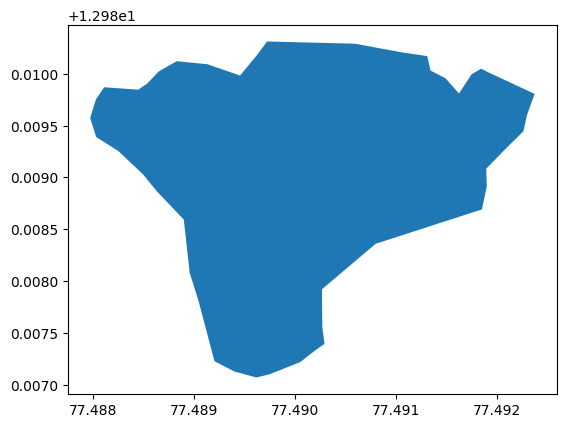

In [ ]:
herohalli = df[df['Name'] == 'Herohalli Lake']
herohalli.plot()

In [ ]:
herohalli


,Name,Description,geometry
125,Herohalli Lake,,"MULTIPOLYGON Z (((77.4892 12.98723 0, 77.48904..."


In [24]:
herohalli.to_file('herohalli.geojson', driver="GeoJSON")